In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os

np.random.seed(0)
tf.random.set_seed(0)

# Linear Regression

In [5]:
class Linear_dataset:
    def true_func(self, x):
        x_shift = x-0
        y = -1*x_shift*x_shift + 1
        return y

    def get_dataset(self, size):
        np.random.seed(0)
        x = np.random.uniform(-1, 1, size)
        noise = np.random.normal(0, 0.1, size)
        y = self.true_func(x) + noise
        return x,y

In [6]:
class Linear:
    def feature(self, x):
        order = 10
        x_feature = np.expand_dims(np.ones_like(x), axis=0)
        for o in range(1, order+1):
            x_feature = np.concatenate((x_feature, [np.power(x, o)]), axis=0)
        return x_feature.T

    def linear_func(self, x_feature, w):
        return np.dot(x_feature, w)

    def gradient_descent(self, w, x_feature, y_train):
        lr = 0.1
        reg_lambda = 0.1
        y_pred = self.linear_func(x_feature, w)
        gradient = np.average((y_pred - y_train) * x_feature.T, axis=1)
        w[0] = w[0] - lr * gradient[0]
        w[1:] = w[1:] * (1 - lr*reg_lambda/len(y_train)) - lr * gradient[1:]
        return w

    def loss_fn(self, x_feature, w, y_train):
        return np.average(np.power(self.linear_func(x_feature, w) - y_train, 2))
    
    def normal(self, x_feature, y_train):
        reg_lambda = 0.1
        I = np.identity(x_feature.shape[0])
        I[0,0] = 0
        return np.linalg.inv(x_feature.T @ x_feature + reg_lambda*I) @ x_feature.T @ y_train

linear = Linear()

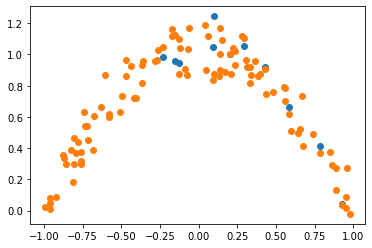

In [7]:
linear_dataset = Linear_dataset()
x_train, y_train = linear_dataset.get_dataset(11)
x_val, y_val = linear_dataset.get_dataset(100)
plt.scatter(x_train, y_train)
plt.scatter(x_val, y_val)

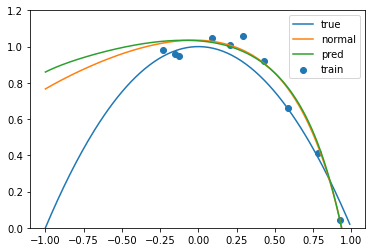

In [8]:
x_feature = linear.feature(x_train)
x_val_feature = linear.feature(x_val)
w_bf = linear.normal(x_feature, y_train)

N = 1000
w = np.zeros(x_feature.shape[1])
w_hist = [np.copy(w)]
loss_hist = [linear.loss_fn(x_feature, w, y_train)]
loss_val_hist = [linear.loss_fn(x_val_feature, w, y_val)]
for i in range(N):
    w = linear.gradient_descent(w, x_feature, y_train)
    loss = linear.loss_fn(x_feature, w, y_train)
    w_hist.append(np.copy(w))
    loss_hist.append(loss)
    
    loss_val = linear.loss_fn(x_val_feature, w, y_val)
    loss_val_hist.append(loss_val)
    
x_test = np.arange(-1,1, 0.01)
y_true = linear_dataset.true_func(x_test)
y_bf = linear.linear_func(linear.feature(x_test), w_bf)
y_pred = linear.linear_func(linear.feature(x_test), w)

plt.scatter(x_train, y_train, label='train')
plt.plot(x_test, y_true, label='true')
plt.plot(x_test, y_bf, label='normal')
plt.plot(x_test, y_pred, label='pred')
plt.ylim(0,1.2)
plt.legend()

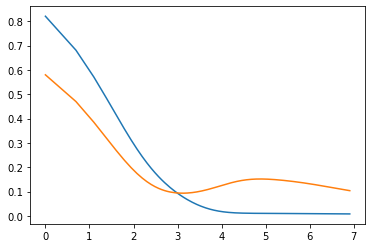

In [9]:
#loss_hist = np.log(loss_hist)
x_loss = np.arange(1,len(loss_hist)+1)
x_loss = np.log(x_loss)
plt.plot(x_loss, loss_hist)
plt.plot(x_loss, loss_val_hist)

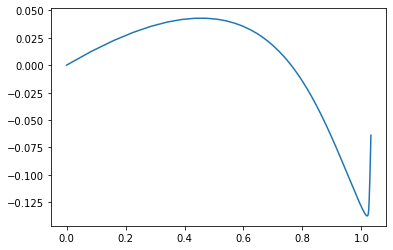

In [10]:
w_hist = np.array(w_hist)
plt.plot(w_hist[:,0], w_hist[:,1])

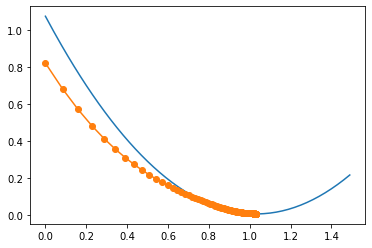

In [11]:
x_loss = np.arange(0,1.5,0.01)
x_w = np.repeat([w], x_loss.shape, axis=0)
x_w[:,0] = x_loss
loss = [linear.loss_fn(x_feature, w, y_train) for w in x_w]
plt.plot(x_loss, loss)
w0_hist = np.array(w_hist)[:,0]
plt.plot(w0_hist, loss_hist, '-o')

# Logistic Regression

In [12]:
class Logistic:
    def true_func(self, x):
        y = 1 / (1 + np.exp(-4*(x-0.2)))
        return y

    def get_dataset(self, size):
        x = np.random.uniform(-1, 1, size)
        #noise = np.random.normal(0, 0.1, size)
        p = self.true_func(x)
        y = np.zeros_like(x)
        for i, pp in enumerate(p):
            y[i] = np.random.rand() < pp
        return x,y
    
    def feature(self, x):
        order = 1
        x_feature = np.expand_dims(np.ones_like(x), axis=0)
        for o in range(1, order+1):
            x_feature = np.concatenate((x_feature, [np.power(x, o)]), axis=0)
        return x_feature.T

    def logistic_func(self, x_feature, w):
        return np.power(1 + np.exp(-np.dot(x_feature, w)), -1)

    def gradient_descent(self, w, x_feature, y_train):
        lr = 0.1
        y_pred = self.logistic_func(x_feature, w)
        gradient = np.average((y_pred - y_train) * x_feature.T, axis=1)
        w = w - lr * gradient
        return w

    def loss_fn(self, x_feature, w, y_train):
        h = self.logistic_func(x_feature, w)
        h[y_train==1] = -np.log(h[y_train==1])
        h[y_train==0] = -np.log(1-h[y_train==0])
        return np.average(h)

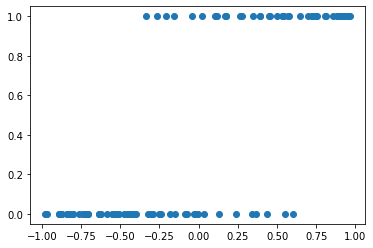

In [13]:
logistic = Logistic()
x_train, y_train = logistic.get_dataset(100)
plt.scatter(x_train, y_train)

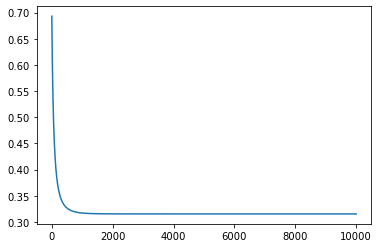

In [14]:
x_feature = logistic.feature(x_train)

N = 10000
w = np.zeros(x_feature.shape[1])
w_hist = [w]
loss_hist = [logistic.loss_fn(x_feature, w, y_train)]

for i in range(N):
    w = logistic.gradient_descent(w, x_feature, y_train)
    loss = logistic.loss_fn(x_feature, w, y_train)
    w_hist.append(w)
    loss_hist.append(loss)

plt.plot(loss_hist)

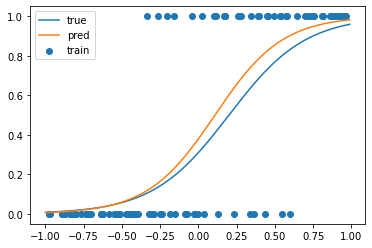

In [15]:
x_test = np.arange(-1,1, 0.01)
y_true = logistic.true_func(x_test)
y_pred = logistic.logistic_func(logistic.feature(x_test), w)

plt.scatter(x_train, y_train, label='train')
plt.plot(x_test, y_true, label='true')
plt.plot(x_test, y_pred, label='pred')
plt.legend()

# MLP

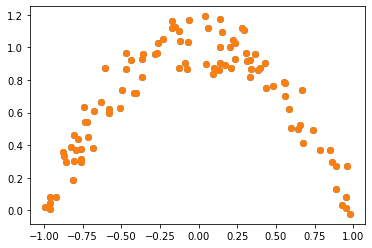

In [16]:
linear_dataset = Linear_dataset()
x_train, y_train = linear_dataset.get_dataset(100)
x_val, y_val = linear_dataset.get_dataset(100)
plt.scatter(x_train, y_train)
plt.scatter(x_val, y_val)

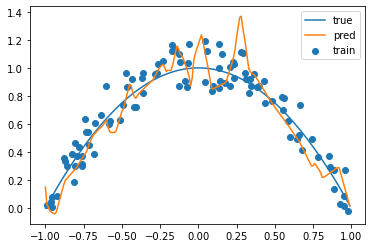

In [17]:
class MLP:
    def __init__(self, input_dim, units, l2_reg=0):
        self.units = units
        np.random.seed(0)
        self.weights = ([np.random.normal(0, 1, (input_dim, units[0]))] + 
                        [np.random.normal(0, 1, (units[i], units[i+1])) for i in range(len(units)-1)])
        #self.weights = [np.zeros((input_dim, units[0]))] + [np.zeros((units[i], units[i+1])) for i in range(len(units)-1)]
        self.bias = [np.zeros(u) for u in units]
        self.activations = [np.zeros(input_dim)] + [np.zeros(u) for u in units]
        self.l2_reg = l2_reg
        self.init_grad()
    
    def init_grad(self):
        self.accumgrad_w = [np.zeros_like(w) for w in self.weights]
        self.accumgrad_b = [np.zeros_like(b) for b in self.bias]
        self.batch_count = 0
    
    def relu(self, x):
        return np.maximum(x, 0)
    
    def relu_grad(self, z):
        return (z>0).astype(float)
    
    def sigmoid(self, x):
        return 1.0 / (1 + np.exp(-x))
    
    def sigmoid_grad(self, x):
        return self.sigmoid(x) * (1-self.sigmoid(x))
    
    def quadratic_fn(self, x):
        return x*x
    
    def quadratic_grad(self, x):
        return 2*x
    
    def activation_fn(self,x):
        return self.relu(x)
    
    def activation_grad(self,x):
        return self.relu_grad(x)
    
    def forward(self, x):
        y = x
        self.activations[0] = y
        for i,(w,b) in enumerate(zip(self.weights[:-1], self.bias[:-1])):
            y = self.activation_fn(y @ w + b)
            self.activations[i+1] = y
        y = y @ self.weights[-1] + self.bias[-1]
        self.activations[-1] = y
        return y
    
    def loss_fn(self, x, y):
        loss_data = np.sum(np.square(self.forward(x) - y))
        loss_weights = [np.sum(np.square(w)) for w in self.weights]
        return 1.0/2 * (loss_data + self.l2_reg * np.sum(loss_weights))
        
    def backpropagate(self, x, y, check=False):
        pred = self.forward(x)
        L = len(self.units)
        delta = [0] * L
        grad_w = [0] * L
        grad_b = [0] * L
        
        # a[-2] * w[-1] + b[-1] = a[-1]
        # l = 1/2 * (a[-1] - y)^2
        # del[-1] = (a[-1] - y)
        # d(l)/d(w[-1]) = del[-1] * a[-2]
        delta[-1] = self.activations[-1] - y
        grad_w[-1] = np.outer(self.activations[-2], delta[-1])
        grad_b[-1] = delta[-1]
        grad_w[-1] += self.l2_reg * self.weights[-1]

        # g(a[i] * w[i] + b[i]) = a[i+1]
        for i in range(L-2,-1,-1):
            z = self.activations[i] @ self.weights[i] + self.bias[i]
            delta[i] = self.weights[i+1] @ delta[i+1] * self.activation_grad(z)
            grad_w[i] = np.outer(self.activations[i], delta[i])
            grad_b[i] = delta[i]
            grad_w[i] += self.l2_reg * self.weights[i]

        for i in range(L):
            self.accumgrad_w[i] += grad_w[i]
            self.accumgrad_b[i] += grad_b[i]
        self.batch_count += 1
        
        
        if (check):
            gradc_w, gradc_b = self.gradient_aprox(x, y)
            error_w = [np.sum(np.square(g-gc)) for g,gc in zip(grad_w, gradc_w)]
            error_b = [np.sum(np.square(g-gc)) for g,gc in zip(grad_b, gradc_b)]
#             print(self.activations)
#             print(self.weights, self. bias)
#             print(delta)
#             print(grad_w, grad_b)
#             print(gradc_w, gradc_b)
            print(error_w, error_b)
        return grad_w, grad_b

    def update(self, lr=0.01):
        for i in range(len(self.units)):
            avggrad_w = self.accumgrad_w[i] / self.batch_count
            avggrad_b = self.accumgrad_b[i] / self.batch_count
            self.weights[i] -= lr * avggrad_w
            self.bias[i] -= lr * avggrad_b
        self.init_grad()

    def gradient_aprox(self, x, y, epsilon=0.0001):
        L = len(self.units)
        grad_w = [np.zeros_like(w) for w in self.weights]
        grad_b = [np.zeros_like(b) for b in self.bias]
        
        for i in range(L):
            for j in range(len(self.weights[i])):
                for k in range(len(self.weights[i][j])):
                    temp = self.weights[i][j,k]
                    self.weights[i][j,k] = temp + epsilon
                    l_p = self.loss_fn(x,y)
                    self.weights[i][j,k] = temp - epsilon
                    l_m = self.loss_fn(x,y)
                    grad_w[i][j,k] = (l_p-l_m) / (2*epsilon)
                    self.weights[i][j,k] = temp
            
            for j in range(len(self.bias[i])):
                    temp = self.bias[i][j]
                    self.bias[i][j] = temp + epsilon
                    l_p = self.loss_fn(x,y)
                    self.bias[i][j] = temp - epsilon
                    l_m = self.loss_fn(x,y)
                    grad_b[i][j] = (l_p-l_m) / (2*epsilon)
                    self.bias[i][j] = temp
        self.loss_fn(x,y) # reset activations
        return grad_w, grad_b

    def evaluate(self, x_train, y_train):
        return np.average([self.loss_fn([x], [y]) for x,y in zip(x_train, y_train)])

    def fit(self, x_train, y_train, epoch=100, lr=0.0001):
        history = {'loss':[], 'val_loss':[]}
        for i in range(epoch):
            for x,y in zip(x_train, y_train):
                x = np.array([x])
                y = np.array([y])
                self.backpropagate(x,y)
                self.update(lr=lr)
            loss = self.evaluate(x_train, y_train)
            val_loss = self.evaluate(x_val, y_val)
            history['loss'].append(loss)
            history['val_loss'].append(val_loss)
        return history
    
    def predict(self, x_test):
        return [mlp.forward([x]) for x in x_test]
    
def plot(linear_dataset, mlp, x_train, y_train):
    x_test = np.arange(-1,1, 0.01)
    y_true = linear_dataset.true_func(x_test)
    y_pred = mlp.predict(x_test)
    
    plt.scatter(x_train, y_train, label='train')
    plt.plot(x_test, y_true, label='true')
    plt.plot(x_test, y_pred, label='pred')
    #plt.ylim(0,1.2)
    plt.legend()


    
input_dim, output_dim = 1,1
mlp = MLP(input_dim=input_dim, units=[100,100, output_dim], l2_reg=0.01)
history = mlp.fit(x_train, y_train, epoch=10, lr=0.001)
plot(linear_dataset, mlp, x_train, y_train)

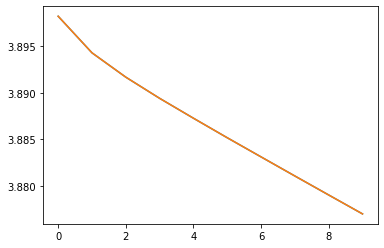

In [18]:
loss = np.log(history['loss'])
val_loss = np.log(history['val_loss'])
#y = history
plt.plot(loss)
plt.plot(val_loss)
#plt.ylim(0.005, 0.01)

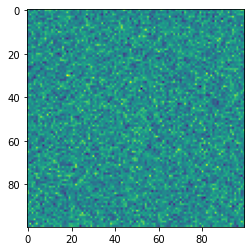

In [19]:
plt.imshow(mlp.weights[1])

(array([1.000e+00, 8.000e+00, 3.300e+01, 7.300e+01, 1.660e+02, 3.950e+02,
        6.420e+02, 1.005e+03, 1.277e+03, 1.524e+03, 1.498e+03, 1.195e+03,
        9.800e+02, 5.820e+02, 3.510e+02, 1.670e+02, 6.600e+01, 2.900e+01,
        7.000e+00, 1.000e+00]),
 array([-3.72112987, -3.34956097, -2.97799206, -2.60642315, -2.23485425,
        -1.86328534, -1.49171643, -1.12014753, -0.74857862, -0.37700971,
        -0.00544081,  0.3661281 ,  0.73769701,  1.10926591,  1.48083482,
         1.85240373,  2.22397263,  2.59554154,  2.96711045,  3.33867935,
         3.71024826]),
 <BarContainer object of 20 artists>)

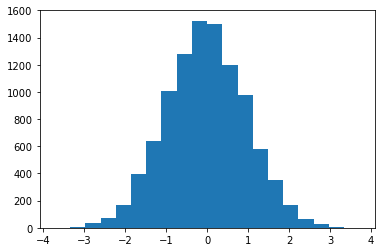

In [20]:
h = mlp.weights[1].flatten()
plt.hist(h, bins=20)

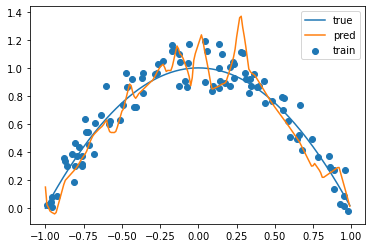

In [21]:
class MLP_tf:
    def __init__(self, input_dim, units, l2_reg=0):
        self.units = units
        np.random.seed(0)
        w = ([np.random.normal(0, 1, (input_dim, units[0]))] + 
                        [np.random.normal(0, 1, (units[i], units[i+1])) for i in range(len(units)-1)])
        b = [np.zeros(u) for u in units]
        self.weights = [tf.Variable(x, dtype=tf.float32) for x in w]
        self.bias = [tf.Variable(x, dtype=tf.float32) for x in b]
        self.l2_reg = l2_reg
    
    def activation_fn(self,x):
        y = tf.nn.relu(x)
        #y = tf.sigmoid(x)
        return y
        
    def forward(self, x):
        y = tf.reshape(x, [1,-1])
        for i,(w,b) in enumerate(zip(self.weights[:-1], self.bias[:-1])):
            y = self.activation_fn(y @ w + b)
        y = y @ self.weights[-1] + self.bias[-1]
        return tf.squeeze(y)
    
    def loss_fn(self, x, y):
        loss_data = tf.reduce_sum(tf.square(self.forward(x) - y))
        loss_weights = [tf.reduce_sum(tf.square(w)) for w in self.weights]
        return 1.0/2 * (loss_data + self.l2_reg * tf.reduce_sum(loss_weights))
    
    def backpropagate(self, x, y):
        with tf.GradientTape() as tape:
            loss = self.loss_fn(x, y)
        return tape.gradient(loss, [self.weights, self.bias])
    
    def update(self, gradient, lr=0.01):
        grad_w, grad_b = gradient
        for i in range(len(self.units)):
            self.weights[i].assign_sub(lr * grad_w[i])
            self.bias[i].assign_sub(lr * grad_b[i])
            
    def evaluate(self, x_train, y_train):
        convert = lambda x: tf.convert_to_tensor([x], dtype=tf.float32)
        return np.average([self.loss_fn(convert(x), convert(y)) for x,y in zip(x_train, y_train)])

    def fit(self, x_train, y_train, epoch=100, lr=0.0001):
        convert = lambda x: tf.convert_to_tensor([x], dtype=tf.float32)
        history = {'loss':[], 'val_loss':[]}
        for i in range(epoch):
            for x,y in zip(x_train, y_train):
                x = convert(x)
                y = convert(y)
                gradients = self.backpropagate(x,y)
                self.update(gradients, lr=lr)
            
            loss = self.evaluate(x_train, y_train)
            val_loss = self.evaluate(x_val, y_val)
            history['loss'].append(loss)
            history['val_loss'].append(val_loss)
        return history
    
    def predict(self, x_test):
        convert = lambda x: tf.convert_to_tensor([x], dtype=tf.float32)
        return [self.forward(convert(x)) for x in x_test]

    
input_dim, output_dim = 1,1
mlp_tf = MLP_tf(input_dim=input_dim, units=[100,100, output_dim], l2_reg=0.01)
history = mlp_tf.fit(x_train, y_train, epoch=10, lr=0.001)
plot(linear_dataset, mlp_tf, x_train, y_train)

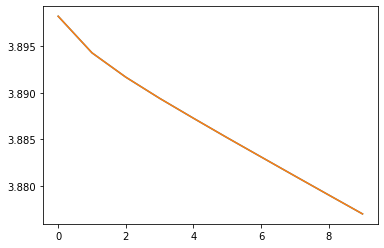

In [22]:
loss = np.log(history['loss'])
val_loss = np.log(history['val_loss'])
#y = history
plt.plot(loss)
plt.plot(val_loss)
#plt.ylim(0.005, 0.01)

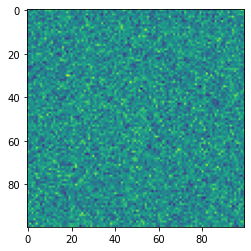

In [23]:
plt.imshow(mlp_tf.weights[1].numpy())

In [24]:
input_dim, output_dim = 1,1
np.random.seed(0)
x, y = np.random.normal(0, 1, [input_dim]), np.random.normal(0, 1, [output_dim])
x, y = [1],[2]
x_tf, y_tf = tf.constant(x, dtype=tf.float32), tf.constant(y, dtype=tf.float32)

units = [3, output_dim]
mlp = MLP(input_dim=input_dim, units=units, l2_reg=0.00)
mlp_tf = MLP_tf(input_dim=input_dim, units=units, l2_reg=0.00)

print(mlp.forward(x))
print(mlp_tf.forward(x_tf).numpy())

print(mlp.backpropagate(x, y, False))
wg, bg = mlp_tf.backpropagate(x_tf, y_tf)
print([x.numpy() for x in wg], [x.numpy() for x in bg])

mlp.update()
mlp_tf.update((wg, bg))

print(mlp.forward(x))
print(mlp_tf.forward(x_tf).numpy())

[3.74387071]
3.7438703
([array([[ 3.90782803,  3.25677969, -1.70424627]]), array([[3.07627923],
       [0.69782244],
       [1.70679251]])], [array([ 3.90782803,  3.25677969, -1.70424627]), array([1.74387071])])
[array([[ 3.907827 ,  3.256779 , -1.7042458]], dtype=float32), array([[3.0762784],
       [0.6978223],
       [1.7067921]], dtype=float32)] [array([ 3.907827 ,  3.256779 , -1.7042458], dtype=float32), array([1.7438703], dtype=float32)]
[3.32484906]
3.3248494
